**ANALISIS REGRESI FAKTOR YANG MEMPENGARUHI KEKUATAN BETON**

Mata Kuliah Analisis Data Eksploratif B083

Kelompok Fomo:
1. Karina Auralia (23083010072)
2. Marthalia Kusumarima (23083010100)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [2]:
# Import dataset
df = pd.read_excel('/content/concrete_data.xlsx')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54
...,...,...,...,...,...,...,...,...,...
195,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,14,32.90
196,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,56,60.32
197,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09
198,146.5,114.6,89.3,201.9,8.8,860.0,829.5,28,19.99


# Data Understanding

In [3]:
# Memeriksa ukuran data
df.shape

(200, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              200 non-null    float64
 1   Blast Furnace Slag  200 non-null    float64
 2   Fly Ash             200 non-null    float64
 3   Water               200 non-null    float64
 4   Superplasticizer    200 non-null    float64
 5   Coarse Aggregate    200 non-null    float64
 6   Fine Aggregate      200 non-null    float64
 7   Age                 200 non-null    int64  
 8   Strength            200 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.2 KB


In [5]:
# Memeriksa nama-nama kolom dalam dataset
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [6]:
# Mmemeriksi apakah terdapat missing value dalam dataset
miss = df.isnull().sum().sort_values(ascending=False)
miss

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,270.43050,72.429000,58.870000,180.945500,6.344000,970.947000,778.986000,49.900000,35.377450
std,90.84768,83.890215,64.258388,21.529699,6.034929,73.824323,76.825623,73.900245,15.963446
min,116.00000,0.000000,0.000000,126.600000,0.000000,801.100000,594.000000,3.000000,4.830000
25%,194.70000,0.000000,0.000000,164.600000,0.000000,932.000000,738.500000,7.000000,23.802500
50%,257.95000,21.000000,0.000000,185.000000,7.000000,968.000000,781.100000,28.000000,34.835000
75%,331.00000,141.600000,118.300000,193.200000,10.400000,1012.875000,829.625000,56.000000,46.372500
max,540.00000,342.100000,200.100000,228.000000,32.200000,1125.000000,992.600000,365.000000,75.500000


# Hubungan antar Variabel

In [8]:
# Menghitung Korelasi Pearson antar variabel
correlation = df.corr()
correlation

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.190517,-0.365188,-0.088105,0.164046,-0.208689,-0.178671,0.029244,0.494622
Blast Furnace Slag,-0.190517,1.000000,-0.358907,0.191534,-0.019222,-0.293103,-0.418836,-0.011665,0.051243
Fly Ash,-0.365188,-0.358907,1.000000,-0.302456,0.424652,-0.041991,0.130246,-0.158832,0.064356
Water,-0.088105,0.191534,-0.302456,1.000000,-0.666612,-0.238937,-0.539463,0.339008,-0.302964
Superplasticizer,0.164046,-0.019222,0.424652,-0.666612,1.000000,-0.294574,0.263265,-0.236651,0.414759
Coarse Aggregate,-0.208689,-0.293103,-0.041991,-0.238937,-0.294574,1.000000,0.002477,0.005830,-0.127105
Fine Aggregate,-0.178671,-0.418836,0.130246,-0.539463,0.263265,0.002477,1.000000,-0.195324,-0.192480
Age,0.029244,-0.011665,-0.158832,0.339008,-0.236651,0.005830,-0.195324,1.000000,0.333816
Strength,0.494622,0.051243,0.064356,-0.302964,0.414759,-0.127105,-0.192480,0.333816,1.000000


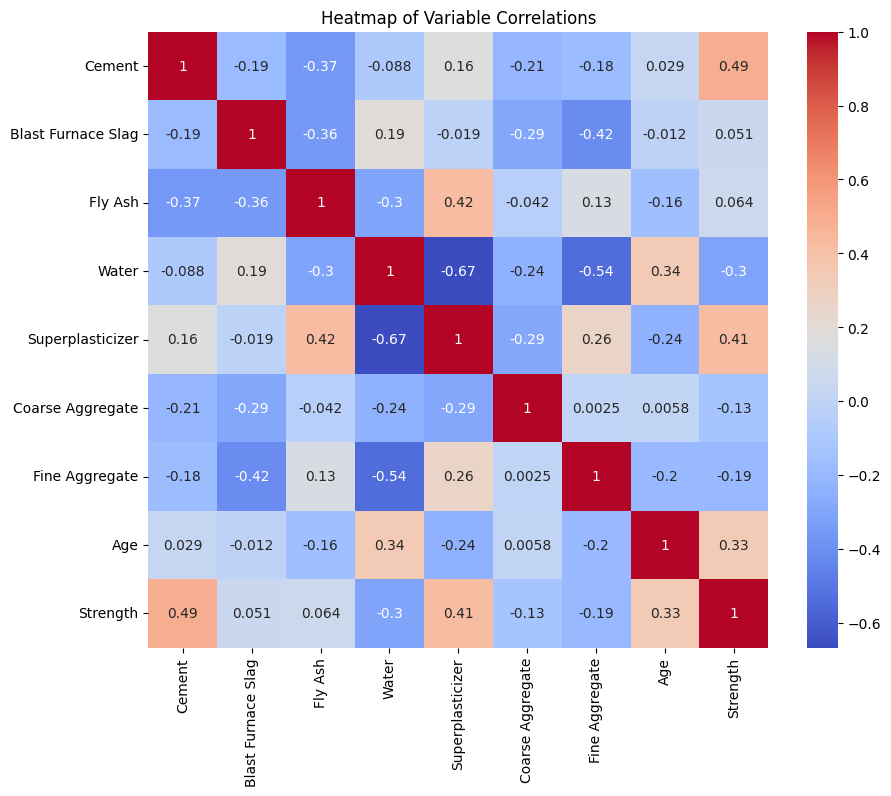

In [9]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()

**Interpretasi:**

Heatmap di atas menunjukkan bahwa variabel **Cement**, **Age**, dan **Superplasticizer** memiliki korelasi yang kuat dan positif dengan variabel strength. Hal ini berarti peningkatan jumlah ketiga variabel ini cenderunh meningkatkan kekuatan beton. Sementara itu, variabel **blast furnace slag** dan **fly ash** menunjukkan korelasi positif yang lemah, yang mengindikasikan pengaruhnya terhadap kekuatan beton relatif kecil.

Lalu, variabel **Coarse Aggregate** dan **Fine Aggregate** menunjukkan korelasi negatif yang lemah dengan variabel strength. Hal ini berarti penambahan keduanya cenderung menurunkan kekuatan beton walaupun mungkin hanya sedikit.

# Model Regresi Linier Berganda

In [10]:
x = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
        'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Strength']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     50.28
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           4.85e-43
Time:                        14:05:45   Log-Likelihood:                -724.02
No. Observations:                 200   AIC:                             1466.
Df Residuals:                     191   BIC:                             1496.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2844     64

Y Topi =β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8

Strength = −2.2844 + 0.1236(Cement) + 0.0819(Blast Furnace Slag) + 0.1088(Fly Ash) − 0.2067(Water) + 0.2544(Superplasticizer) + 0.0266(Coarse Aggregate) − 0.0046(Fine Aggregate) + 0.1080(Age)

**Interpretasi :**

Dari model diatas didapatkan **R-Squared** sebesar **0.678** yang artinya sekitar 67,8% variasi dalam variabel dependen (Strength) dapat dijelaskan oleh variabel independen dalam model. Nilai ini cukup baik dan menunjukkan bahwa model memiliki kemampuan yang cukup untuk menjelaskan data. **Adjusted R-Squared** sebesar **0.665**, sedikit lebih rendah dibanding R-Squared yang wajar karena disesuaikan dengan jumlah variabel independen. Nilai ini menunjukkan model yang cukup kuat.

Sehingga model ini cukup baik dalam menjelaskan kekuatan beton (Strength) berdasarkan variabel independennya, terutama Cement, Blast Furnace Slag, Fly Ash, Water, dan Age. Namun, ada beberapa variabel seperti Superplasticizer, Coarse Aggregate, dan Fine Aggregate yang tidak signifikan secara statistik, sehingga dapat mempertimbangkan untuk mengevaluasi ulang apakah data tersebut perlu digunakan dalam model.

In [11]:
# Menghasilkan nilai prediksi
prediksi = model.predict(x)
print(prediksi)

0      53.988433
1      49.338124
2      61.554515
3      48.905999
4      16.395499
         ...    
195    35.631369
196    46.594708
197    27.412135
198    17.569468
199    20.167668
Length: 200, dtype: float64


In [12]:
# Menghasilkan nilai residual
residual = model.resid
print(residual)

0      -1.078433
1       6.561876
2      12.945485
3     -13.605999
4      -5.855499
         ...    
195    -2.731369
196    13.725292
197   -12.322135
198     2.420532
199     5.562332
Length: 200, dtype: float64


# Uji F

In [27]:
from scipy.stats import f

# Mengambil nilai R-squared dan nilai k
R_squared = model.rsquared
k = len(model.params) - 1
n = len(df['Strength'])

# Hitung statistik F
f_hit = (R_squared / k) / ((1 - R_squared) / (n - k - 1))
p_value = 1 - f.cdf(f_hit, k, n - k - 1)
tabel_f = f.ppf(1 - 0.05, k, n - k - 1)

# Hasil uji F
results_F = {
    'F hitung': f_hit,
    'p_value': p_value,
    'F tabel': tabel_f,
    'Hypothesis_Test': 'H0 ditolak' if p_value < 0.05 else 'H0 gagal ditolak'
}

# Menampilkan hasil
results_F

{'F hitung': 50.277965154292055,
 'p_value': 1.1102230246251565e-16,
 'F tabel': 1.9871377638880656,
 'Hypothesis_Test': 'H0 ditolak'}

**Interpretasi:**

Dengan tingkat signifikansi sebesar 0.05, didapatkan nilai F hitung = 50.28 yang lebih besar daripada F tabel = 1.99 dan juga nilai p-value = 1.11e-16 yang kurang dari 0.05. Sehingga, dapat disimpulkan bahwa **H0 ditolak** yang artinya minimal terdapat satu variabel independen yang berpengaruh terhadap variabel dependen.

# Uji T

In [14]:
# Mengambil koefisien dan standar error tanpa konstanta
coefficients = model.params[1:]
std_errors = model.bse[1:]

# Menghitung t-statistik
t_hit = coefficients / std_errors

# Derajat kebebasan untuk uji t
df_freedom = len(df) - len(x.columns)  # n - k (jumlah data - jumlah prediktor)
p_values_t = [2 * (1 - stats.t.cdf(abs(t_stat), df_freedom)) for t_stat in t_hit]

# Hasil uji T
results_t = pd.DataFrame({
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    'T hitung': t_hit,
    'p_value': p_values_t,
    'Hypothesis_Test': ['H0 ditolak' if p < 0.05 else 'H0 gagal ditolak' for p in p_values_t]
})

# Menampilkan hasil
results_t

,Coefficient,Std_Error,T hitung,p_value,Hypothesis_Test
Cement,0.123597,0.020187,6.122671,5.127925e-09,H0 ditolak
Blast Furnace Slag,0.081908,0.022771,3.596972,4.099514e-04,H0 ditolak
Fly Ash,0.108811,0.027399,3.971363,1.011583e-04,H0 ditolak
Water,-0.206713,0.098784,-2.092573,3.770852e-02,H0 ditolak
Superplasticizer,0.254421,0.208988,1.217393,2.249568e-01,H0 gagal ditolak
Coarse Aggregate,0.026618,0.022639,1.175755,2.411562e-01,H0 gagal ditolak
Fine Aggregate,-0.004553,0.025030,-0.181896,8.558569e-01,H0 gagal ditolak
Age,0.108031,0.009561,11.299404,0.000000e+00,H0 ditolak


**Interpretasi :**

- Variabel Cement

  Pada variabel Cement, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 6.122671, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Cement berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Cement meningkatkan Strength rata-rata sebesar 0.1236.

- Variabel Blast Furnace Slag

  Pada variabel Blast Furnace Slag, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 3.596972, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Blast Furnace Slag berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Blast Furnace Slag meningkatkan Strength rata-rata sebesar 0.0819.

- Variabel Fly Ash

  Pada variabel Fly Ash, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 3.971363, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Fly Ash berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Fly Ash meningkatkan Strength rata-rata sebesar 0.1088.

- Variabel Water

  Pada variabel Water, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = -2.092573, yang lebih kecil dari 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Water berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Water menurunkan Strength rata-rata sebesar 0.2067.

- Variabel Superplasticizer

  Pada variabel Superplasticizer, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 1.217393, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Superplasticizer tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Coarse Aggregate

  Pada variabel Coarse Aggregate, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼  = 0.05, nilai 𝑡-hitung = 1.175755, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Coarse Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Fine Aggregate

  Pada variabel Fine Aggregate, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = -0.181896, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Fine Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Age

  Pada variabel Age, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 11.299404, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Age berpengaruh signifikan terhadap Strength. Peningkatan 1 unit usia (Age) meningkatkan Strength rata-rata sebesar 0.1080.




# Uji Z

In [15]:
# Mengambil koefisien dan standar error tanpa konstanta
coefficients = model.params[1:]
std_errors = model.bse[1:]

# Menghitung z statistik dan p-value
z_hit = coefficients / std_errors
p_values_z = [2 * (1 - norm.cdf(abs(z))) for z in z_hit]

# Hasil uji Z
results_z = pd.DataFrame({
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    'Z hitung': z_hit,
    'p_value': p_values_z,
    'Hypothesis_Test': ['H0 ditolak' if p < 0.05 else 'H0 gagal ditolak' for p in p_values_z]
})

# Menampilkan hasil
results_z

,Coefficient,Std_Error,Z hitung,p_value,Hypothesis_Test
Cement,0.123597,0.020187,6.122671,9.201957e-10,H0 ditolak
Blast Furnace Slag,0.081908,0.022771,3.596972,3.219430e-04,H0 ditolak
Fly Ash,0.108811,0.027399,3.971363,7.146248e-05,H0 ditolak
Water,-0.206713,0.098784,-2.092573,3.638733e-02,H0 ditolak
Superplasticizer,0.254421,0.208988,1.217393,2.234549e-01,H0 gagal ditolak
Coarse Aggregate,0.026618,0.022639,1.175755,2.396927e-01,H0 gagal ditolak
Fine Aggregate,-0.004553,0.025030,-0.181896,8.556640e-01,H0 gagal ditolak
Age,0.108031,0.009561,11.299404,0.000000e+00,H0 ditolak


**Interpretasi :**

- Variabel Cement

  Pada variabel Cement, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 6.122671, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Cement berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Cement meningkatkan Strength rata-rata sebesar 0.1236.

- Variabel Blast Furnace Slag

  Pada variabel Blast Furnace Slag, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 3.596972, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Blast Furnace Slag berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Blast Furnace Slag meningkatkan Strength rata-rata sebesar 0.0819.

- Variabel Fly Ash

  Pada variabel Fly Ash, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 3.971363, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Fly Ash berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Fly Ash meningkatkan Strength rata-rata sebesar 0.1088.

- Variabel Water

  Pada variabel Water, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = -2.092573, yang lebih kecil dari 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Water berpengaruh signifikan terhadap Strength. Peningkatan 1 unit Water menurunkan Strength rata-rata sebesar 0.2067.

- Variabel Superplasticizer

  Pada variabel Superplasticizer, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 1.217393, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Superplasticizer tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Coarse Aggregate

  Pada variabel Coarse Aggregate, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼  = 0.05, nilai 𝑡-hitung = 1.175755, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Coarse Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Fine Aggregate

  Pada variabel Fine Aggregate, tidak memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = -0.181896, yang lebih kecil dari nilai 𝑡-tabel (𝑡-hitung < 𝑡-tabel). Maka **𝐻0 gagal ditolak**, yang artinya variabel Fine Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Age

  Pada variabel Age, memiliki pengaruh yang signifikan secara statistik terhadap Strength. Dengan 𝛼 = 0.05, nilai 𝑡-hitung = 11.299404, yang lebih besar dari nilai 𝑡-tabel (𝑡-hitung > 𝑡-tabel). Maka **𝐻0 ditolak**, yang artinya variabel Age berpengaruh signifikan terhadap Strength. Peningkatan 1 unit usia (Age) meningkatkan Strength rata-rata sebesar 0.1080.




# Uji Asumsi Residual

## Memeriksa asumsi residual berdistribusi normal

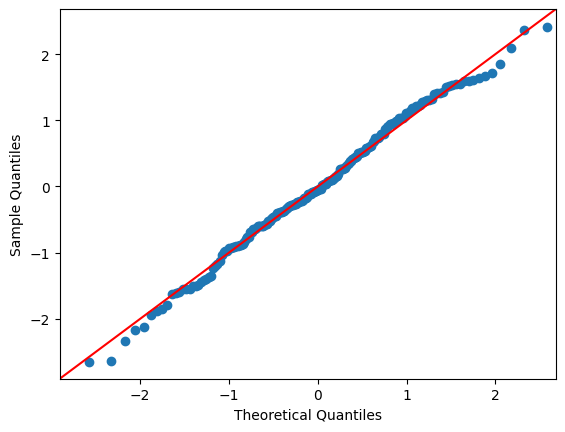

In [16]:
# Menggambar Plot QQ menggunakan package statmodels
fig = sm.qqplot(residual, stats.t, fit=True, line='45')
plt.show()

**Interpretasi:**

Berdasarkan Scatter plot siatas yang merupakan plot untuk memeriksa asumsi residual dapat dinyatakan bahwa titik-titik distribusi data tidak jauh dari garis linier, oleh karena itu dapat disimpulkan bahwa data residual memenuhi asumsi berdistribusi normal, selanjutnya akan di uji menggunakan uji Jarque-Bera.

In [17]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual

# Hipotesis null dan hipotesis alternatif
H0 = 'data berdistribusi normal'
H1 = 'data tidak berdistribusi normal'

# Menentukan level signifikansi
alpha = 0.05

# Menentukan statistik uji
name = ['Jarque-Bera', 'p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

dk = 8 # Derajat kebebasan
tabel_chi_square = stats.chi2.ppf(1 - alpha, dk)
print('Tabel chi-square:', tabel_chi_square)

[('Jarque-Bera', 1.2814400428069992), ('p-value', 0.526912898861358), ('Skew', -0.1294515904909658), ('Kurtosis', 2.7054801398644277)]
Tabel chi-square: 15.50731305586545



**Interpretasi:**

Berdasarkan hasil uji Jarque-Bera, diperoleh nilai statistik Jarque-Bera sebesar 1.2814 dengan p-value sebesar 0.5269. Nilai ini menunjukkan bahwa statistik JB lebih kecil dari nilai chi-square tabel sebesar 15.5073, dan p-value lebih besar dari 0.05. Dengan demikian, 𝐻0 gagal ditolak, yang artinya residual dalam model **berdistribusi normal**. Selain itu, nilai skewness sebesar -0.1295 menunjukkan distribusi residual mendekati simetris, dan nilai kurtosis sebesar 2.7055 mendekati nilai ideal distribusi normal (kurtosis = 3). Oleh karena itu, asumsi normalitas residual terpenuhi, sehingga analisis regresi dapat dilanjutkan dengan menggunakan asumsi ini.

## Memeriksa asumsi residual tidak terjadi autokorelasi

Text(0, 0.5, 'Residual')

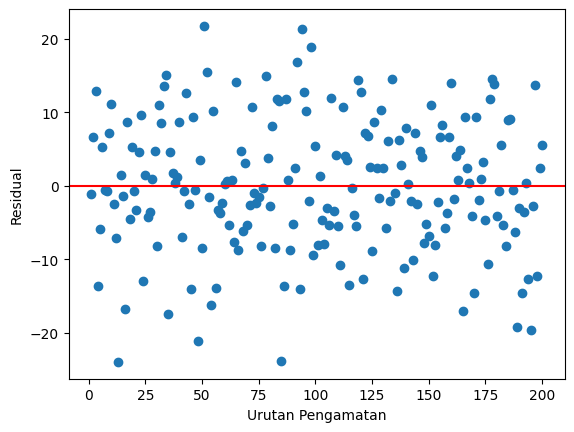

In [18]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(1, len(residual) + 1))
plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Urutan Pengamatan')
plt.ylabel('Residual')


**Interpretasi:**

Berdasarkan scatter plot yang ditampilkan, terlihat bahwa titik-titik data residual tersebar secara acak dan tidak membentuk pola tertentu, seperti pola linier, kurva, atau siklus yang teratur. Penyebaran acak ini mengindikasikan bahwa residual **tidak terjadi korelasi** satu sama lain, atau dengan kata lain, tidak ada hubungan sistematis antar residual dari satu observasi ke observasi lainnya. Hal ini menunjukkan bahwa asumsi tidak terjadinya autokorelasi dalam data residual terpenuhi.

In [19]:
# Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

# Hipotesis null dan hipotesis alternatif
H0 = 'tidak terjadi autokorelasi'
H1 = 'terjadi autokorelasi'

# Menentukan level signifikansi
alpha = 0.05

# Menentukan statistik uji
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 2.20969432970289


**Interpretasi:**

Berdasarkan pengujian Durbin-Watson, diperoleh nilai DW = 2.2097, dengan batas bawah (dL) sebesar 1.6861 dan batas atas (dU) sebesar 1.8522. Berdasarkan kriteria tersebut, kita dapat menarik kesimpulan sebagai berikut:

1. Jika DW < dL: H0 ditolak, yang menunjukkan adanya autokorelasi positif pada residual.
2. Jika DW > dU: H0 gagal ditolak, yang menunjukkan tidak adanya autokorelasi.
3. Jika dL < DW < dU: Tidak dapat disimpulkan apakah ada autokorelasi atau tidak, karena berada di antara batas bawah dan batas atas.

Dalam hal ini didapatkan bahwa DW (2.2097) > dU (1.8522), yang berarti H0 gagal ditolak, jadi hal ini memenuhi asumsi bahwa tidak terjadi autokorelasi.

## Memeriksa asumsi residual tidak terjadi heteroskedastisitas

(7.01460548761433, 75.29681433144128)

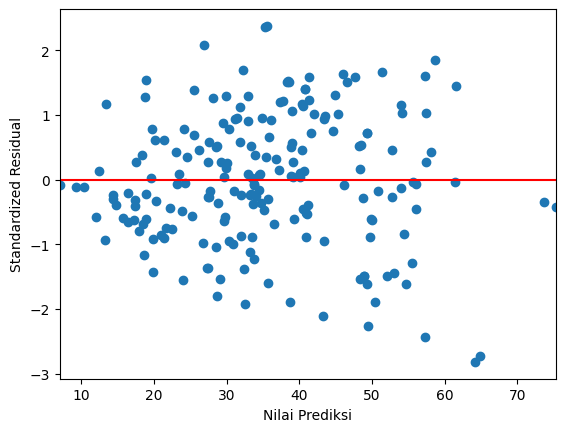

In [20]:
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()

# Menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual)
plt.axhline(0, color="red")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Standardized Residual")
plt.xlim([min(prediksi), max(prediksi)])

**Interpretasi:**

Pada grafik di atas terlihat bahwa semakin meningkat nilai prediksinya akan meningkatkan varians residual. Hal ini berarti data residual terjadi heteroskedastisitas yang artinya varians errornya tidak konsisten.

In [21]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Melakukan regresi dari nilai absolut residual terhadap variabel independen
abs_residual = np.abs(residual)
uji_gletser = sm.OLS(abs_residual, x).fit()

# Hasil uji Gletser
print(uji_gletser.summary())

# Interpretasi
p_values = uji_gletser.pvalues[1:]  # Mengambil nilai p-values
significant_var = [var for var, p in zip(x.columns, p_values) if p < 0.05]

print('\nKesimpulan:')
if significant_var:
    print(f"Variabel yang signifikan terhadap heteroskedastisitas: {', '.join(significant_var)}")
    print("Terdapat indikasi adanya heteroskedastisitas.")
else:
    print("Tidak ditemukan indikasi heteroskedastisitas.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.357
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00127
Time:                        14:05:47   Log-Likelihood:                -607.38
No. Observations:                 200   AIC:                             1233.
Df Residuals:                     191   BIC:                             1262.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.2594     35

### Penanganan menggunakan transformasi

In [22]:
# Transformasi log pada variabel dependen
df['Strength_log'] = np.log(df['Strength'])

# Refit model dengan variabel tertransformasi
model_log = sm.OLS(df['Strength_log'], sm.add_constant(x)).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:           Strength_log   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.00e-38
Time:                        14:05:47   Log-Likelihood:                -62.024
No. Observations:                 200   AIC:                             142.0
Df Residuals:                     191   BIC:                             171.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2841      2

In [23]:
# Menghasilkan nilai prediksi
prediksi_log = model_log.predict(x)
print(prediksi_log)

0      4.099464
1      3.845549
2      4.248819
3      3.830649
4      2.894588
         ...   
195    3.482940
196    3.823514
197    3.261406
198    2.872093
199    2.889009
Length: 200, dtype: float64


### Memeriksa kembali setelah penanganan

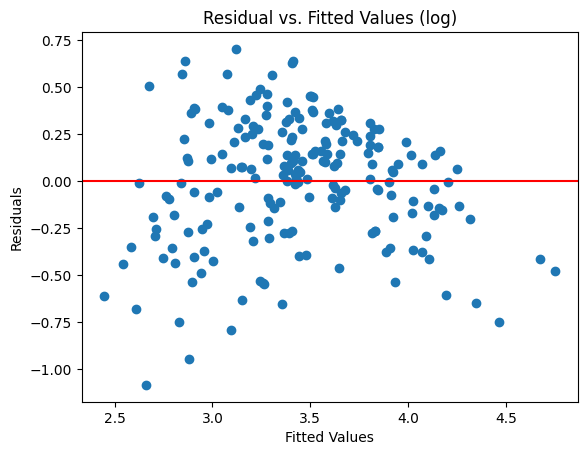

In [24]:
# Residual dari model WLS
residual_log = model_log.resid
fitted_log = model_log.fittedvalues

# Plot Residual vs. Fitted Values
plt.scatter(fitted_log, residual_log)
plt.axhline(0, color='red')
plt.title('Residual vs. Fitted Values (log)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Interpretasi:**

Grafik di atas menunjukkan bahwa data menyebar secara random. Berdasarkan hal itu, maka memenuhi asumsi residual tidak terjadi heteroskedastisitas yang artinya varians residualnya konstan.

In [25]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Melakukan regresi dari nilai absolut residual terhadap variabel independen
abs_residual = np.abs(residual_log)
uji_gletser = sm.OLS(abs_residual, x).fit()

# Hasil uji Gletser
print(uji_gletser.summary())

# Interpretasi
p_values = uji_gletser.pvalues[1:]  # Mengambil nilai p-values
significant_var = [var for var, p in zip(x.columns, p_values) if p < 0.05]

print('\nKesimpulan:')
if significant_var:
    print(f"Variabel yang signifikan terhadap heteroskedastisitas: {', '.join(significant_var)}")
    print("Terdapat indikasi adanya heteroskedastisitas.")
else:
    print("Tidak ditemukan indikasi heteroskedastisitas.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.357
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00127
Time:                        14:05:47   Log-Likelihood:                 55.136
No. Observations:                 200   AIC:                            -92.27
Df Residuals:                     191   BIC:                            -62.59
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1659      1

**Interpretasi:**

Pada tahap awal, dilakukan pemeriksaan menggunakan scatter plot residual terhadap nilai prediksi untuk mendeteksi adanya heteroskedastisitas. Kemudian dilakukan uji Gletser untuk memeriksa kembali asumsi ini. Hasil uji Gletser menujukkan bahwa terdapat beberapa variabel independen yang memiliki p-value signifikan (p-value < 0.05), artinya **variabel Cement dan Fine Aggregate berkontribusi terhadap terjadinya heteroskedastisitas** dalam model.

Setelah dilakukan penanganan, hasil dari uji Gletser menunjukkan bahwa beberapa variabel independen memiliki p-value yang lebih besar dari 0.05. Sehingga,** H0 gagal ditolak, menunjukkan bahwa tidak lagi ditemukan indikasi heteroskedastisitas pada model tertransformasi**. Transformasi logaritma pada variabel dependen ini berhasil mengatasi masalah heteroskedastisitas.

## Memeriksa asumsi tidak terjadi multikolinieritas

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# Menghitung VIF setiap variabel
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

              feature          VIF
0               const  9629.518120
1              Cement     7.829383
2  Blast Furnace Slag     8.495024
3             Fly Ash     7.215936
4               Water    10.529740
5    Superplasticizer     3.703004
6    Coarse Aggregate     6.502612
7      Fine Aggregate     8.607596
8                 Age     1.162104


**Interpretasi:**

Pemeriksaan asumsi tidak terjadinya multikolinieritas dilakukan menggunakan VIF. Berdasarkan hasil analisis, beberapa variabel menunjukkan nilai VIF yang cukup tinggi, seperti Water (10.53), Fine Aggregate (8.61), dan Blast Furnace Slag (8.50), yang mengindikasikan adanya potensi multikolinieritas. Sebaliknya, variabel seperti Superplasticizer (3.70) dan Age (1.16) memiliki nilai VIF yang rendah, menandakan multikolinieritas pada variabel-variabel tersebut tidak signifikan. Nilai VIF yang tinggi mengindikasikan bahwa variabel independen memiliki hubungan linier yang kuat dengan variabel independen lainnya, yang dapat menyebabkan ketidakstabilan dalam estimasi koefisien regresi dan menyulitkan interpretasi model. Secara keseluruhan, meskipun sebagian besar variabel menunjukkan nilai VIF yang rendah, terdapat beberapa variabel dengan multikolinieritas tinggi yang dapat memengaruhi kualitas model regresi. Langkah-langkah penyesuaian perlu dilakukan untuk meningkatkan stabilitas model dan memastikan hasil regresi dapat diinterpretasikan secara akurat.